# ISLP - Chapter 8 - Exercise 7
### Author: pzuehlke

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

As always, we begin by loading the dataset and doing some data cleaning.

In [82]:
housing = pd.read_csv("Boston.csv")
housing = housing.dropna()
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [83]:
housing.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
housing.set_index("ID", inplace=True)
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Now we set the response to `medv` and use all remaining variables to predict it,
then we split the data into training and testing sets.

In [86]:
X = housing.drop("medv", axis=1)
y = housing["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Let's test the random forest regressor with specific arguments:

In [87]:
n = housing.shape[0]
p = housing.shape[1] - 1
RF = RandomForestRegressor(
    max_features=int(np.sqrt(p)), n_estimators=500, random_state=0
)
RF_housing = RF.fit(X_train, y_train)
y_hat_RF = RF_housing.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_hat_RF)
print(n, p)
print(MSE_RF)

506 12
19.64186492421054


We are finally ready to solve the exercise itself. The strategy is suggested by
Figure 8.10: we fit a random forest regressor for $ 3 $ different maximum numbers
of features ($ m = p $, $ m = \frac{p}{2} $ and $ m = \sqrt{p} $) and several
numbers of trees in the range from $ 10 $ to $ 510 $ in a NumPy array. Then we
record the associated MSE on the test set. The code runs in over $ 20 $ seconds
on my machine, so that's about as ambitious as we can be.

In [88]:
max_features_range = [int(np.sqrt(p)), p // 2, p]
n_estimators_range = list(range(10, 510, 20))
errors = np.empty((500 // 20, 3))

for i, n_estimators in enumerate(n_estimators_range):
    for j, max_feat in enumerate(max_features_range):
        RF = RandomForestRegressor(
            max_features=max_feat, n_estimators=n_estimators, random_state=0
        )
        RF_housing = RF.fit(X_train, y_train)
        y_hat_RF = RF_housing.predict(X_test)
        MSE_RF = mean_squared_error(y_test, y_hat_RF)
        errors[i, j] = MSE_RF


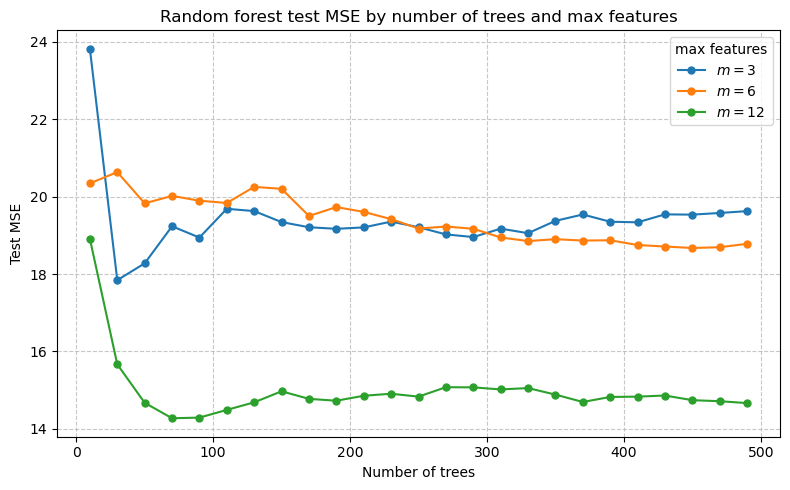

In [89]:
fig, ax = plt.subplots(figsize=(8, 5))
# Plot the MSEs for each pair (max_features, n_estimators):
for j, max_features in enumerate(max_features_range):
    ax.plot(
        n_estimators_range,
        errors[:, j],
        marker="o",
        markersize=5,
        label=f"$ m = {max_features_range[j]} $"
    )

ax.set_xlabel("Number of trees")
ax.set_ylabel("Test MSE")
ax.set_title("Random forest test MSE by number of trees and max features")
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend(title="max features")
plt.tight_layout()
plt.show()

Clearly, in this example we obtain the best results using $ m = p $ and a
moderate number of estimators. Specifically, the minimum MSE seems to occur for
a number of trees in the forest equal to $ 70 $.